In [1]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(tidyr)
filepath <- '/Users/cyz/survey/active_survey/'


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
dataset <- 'cces12'
cur_rank <- 4
cur_alpha <- 1
cur_completer <- 'bpmf'
cur_vmethod <- 'row-norm'

In [3]:
source('eval_util.R')

In [4]:
results <- read_results(dataset) %>% filter(strategy != 'epsilon_greedy')
get_sample_sizes(results)

eval_method,completer,strategy,rank,v_method,optimality,alpha,n
lococv,bpmf,active,2,row-norm,A,1,1
lococv,bpmf,active,4,row-norm,A,1,1
lococv,bpmf,random,2,row-norm,A,1,1
lococv,bpmf,random,4,row-norm,A,1,1
lococv,bpmf,sequential,2,row-norm,A,1,1
lococv,bpmf,sequential,4,row-norm,A,1,1
sparsify,bpmf,active,2,row-norm,A,1,10
sparsify,bpmf,active,4,row-norm,A,1,10
sparsify,bpmf,random,2,row-norm,A,1,10
sparsify,bpmf,random,4,row-norm,A,1,10


In [5]:
strategy_colors <- c('random'='black', 'active'='red', 'sequential'='blue')

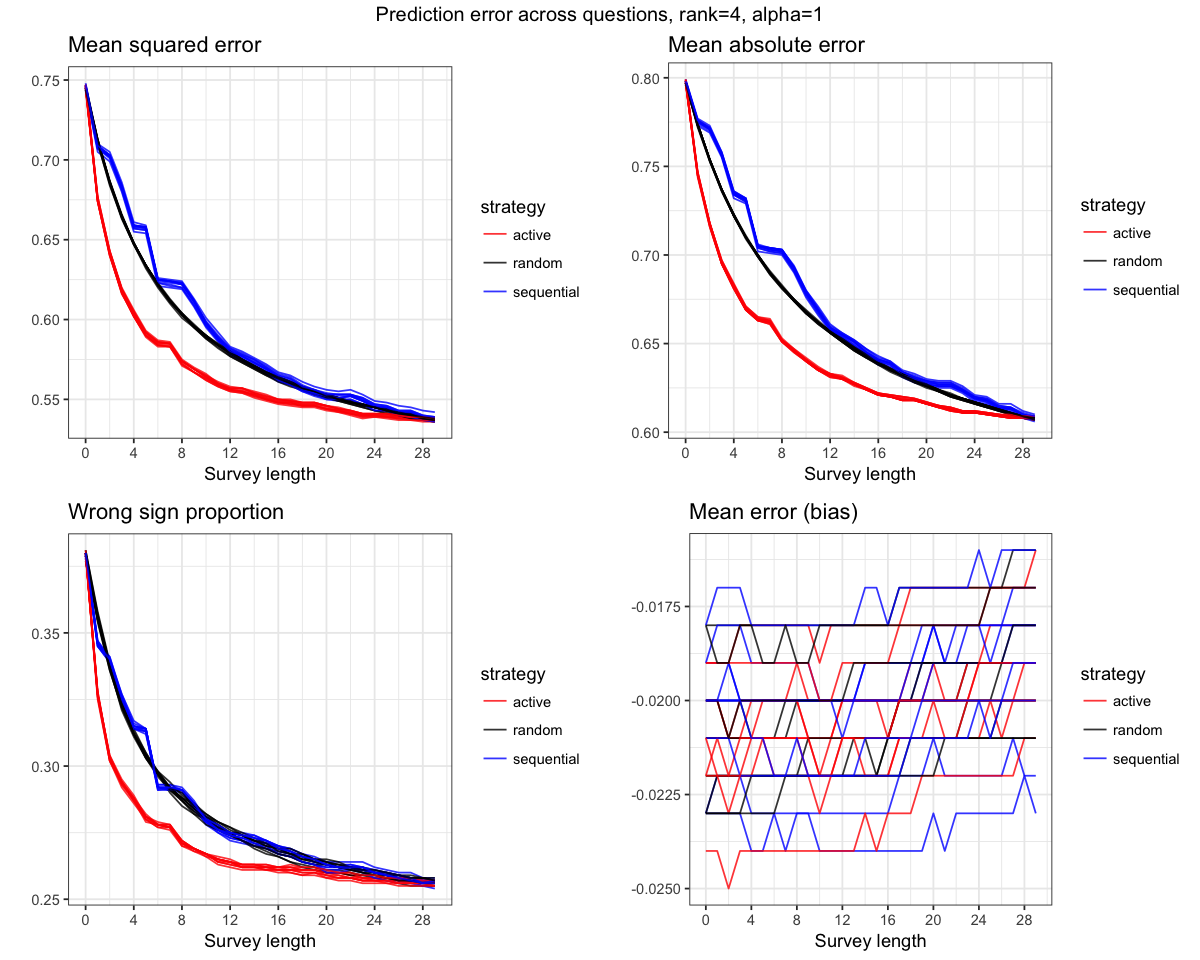

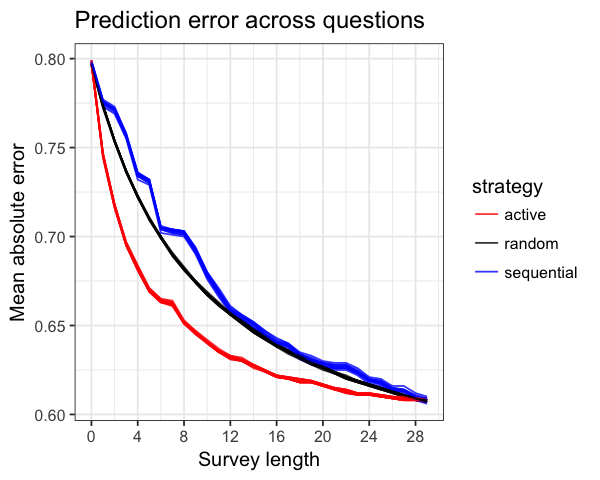

In [6]:
plot_aggregate_error(optimality_type='A')
plot_aggregate_error(optimality_type='A', metric='mae')

In [7]:
# plot_aggregate_error(optimality_type='A', metric='mae', weighted=T)

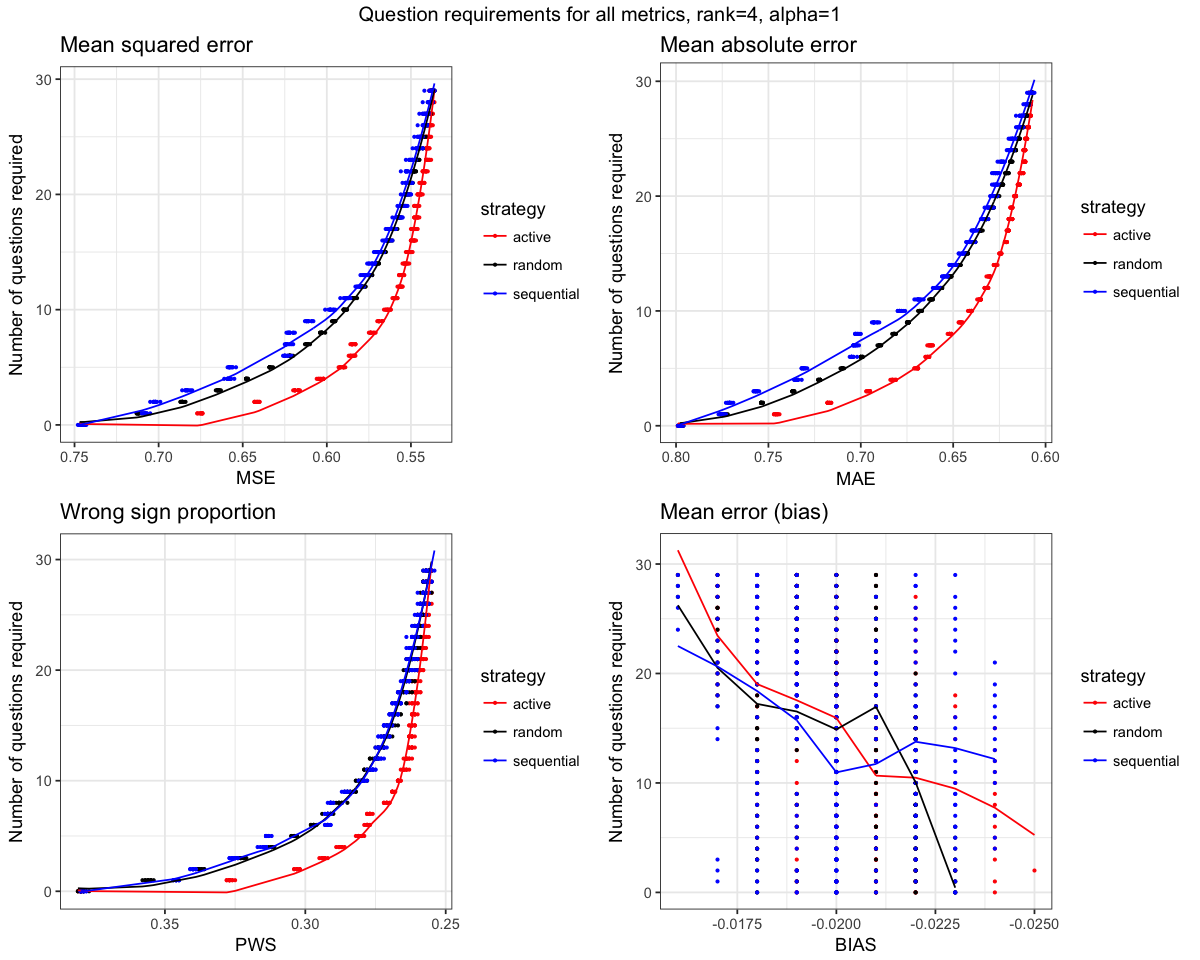

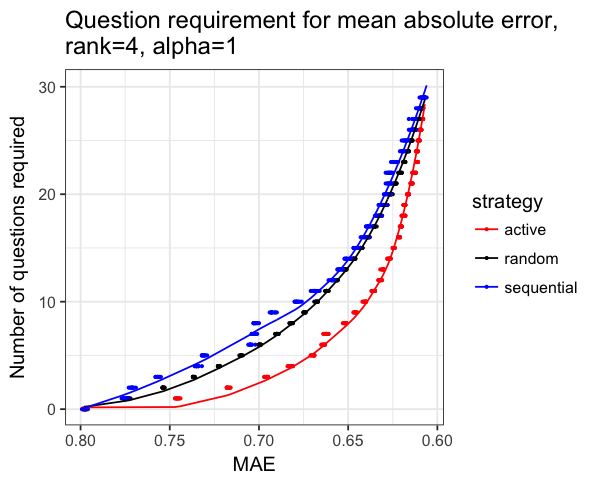

In [8]:
plot_aggregate_error_inverse(optimality_type='A')
plot_aggregate_error_inverse(optimality_type='A', metric='mae')

Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

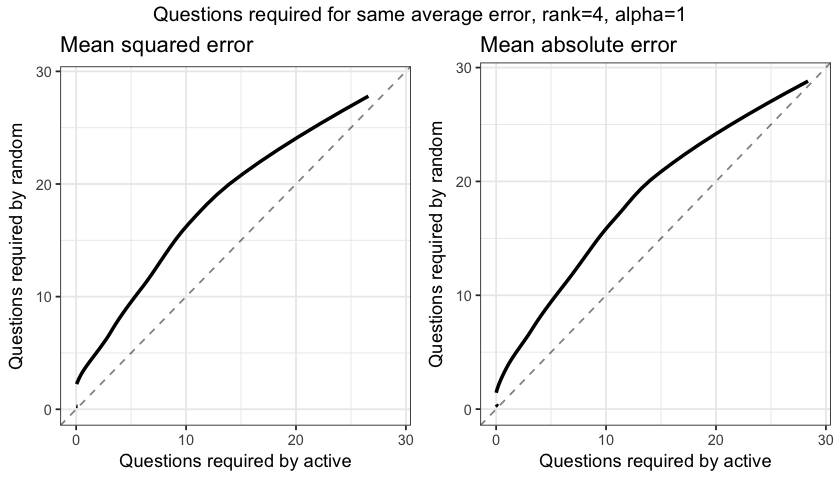

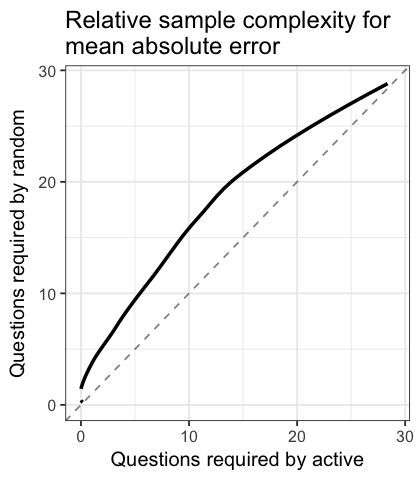

In [9]:
plot_method_comparison(optimality_type='A', base_method='active', compare_method='random')
plot_method_comparison(optimality_type='A', base_method='active', compare_method='random', metric='mae')

In [10]:
# plot_per_question_error(optimality_type='A')

Warning message:
“Column `columns`/`question` joining factors with different levels, coercing to character vector”

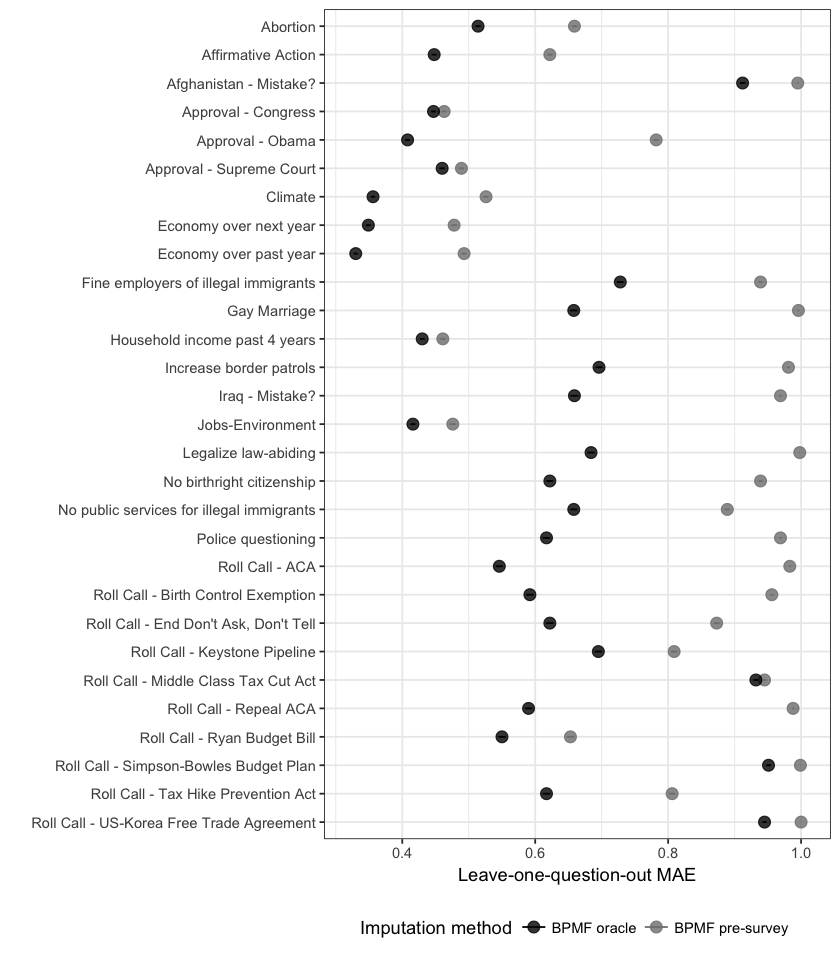

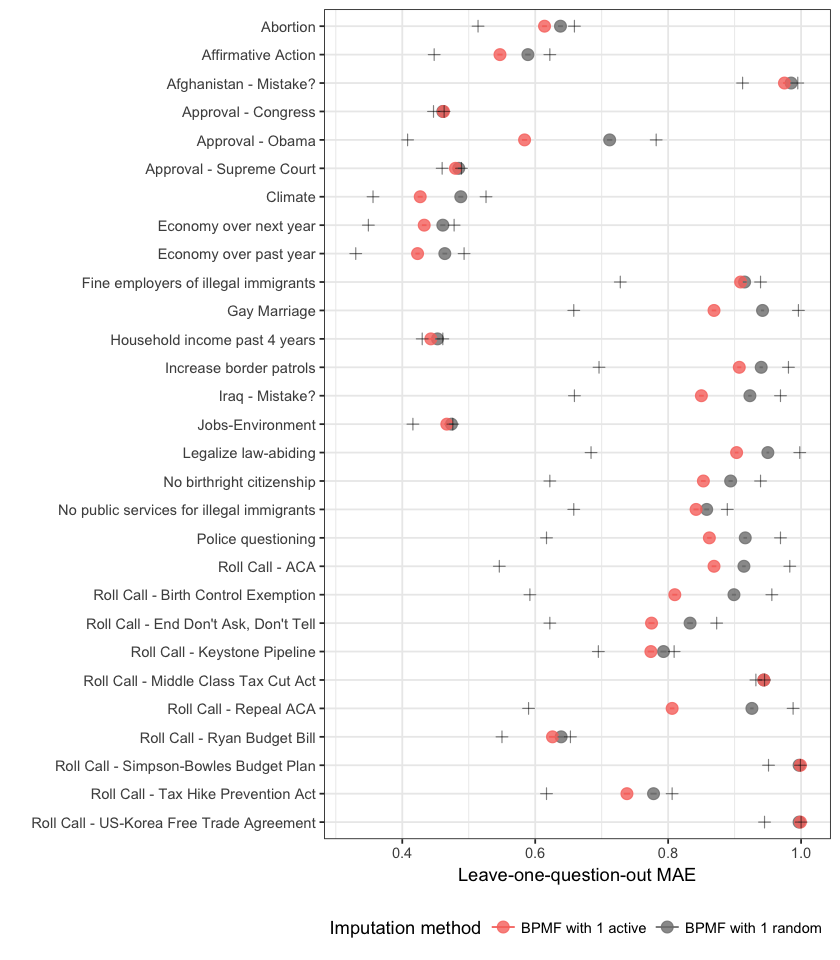

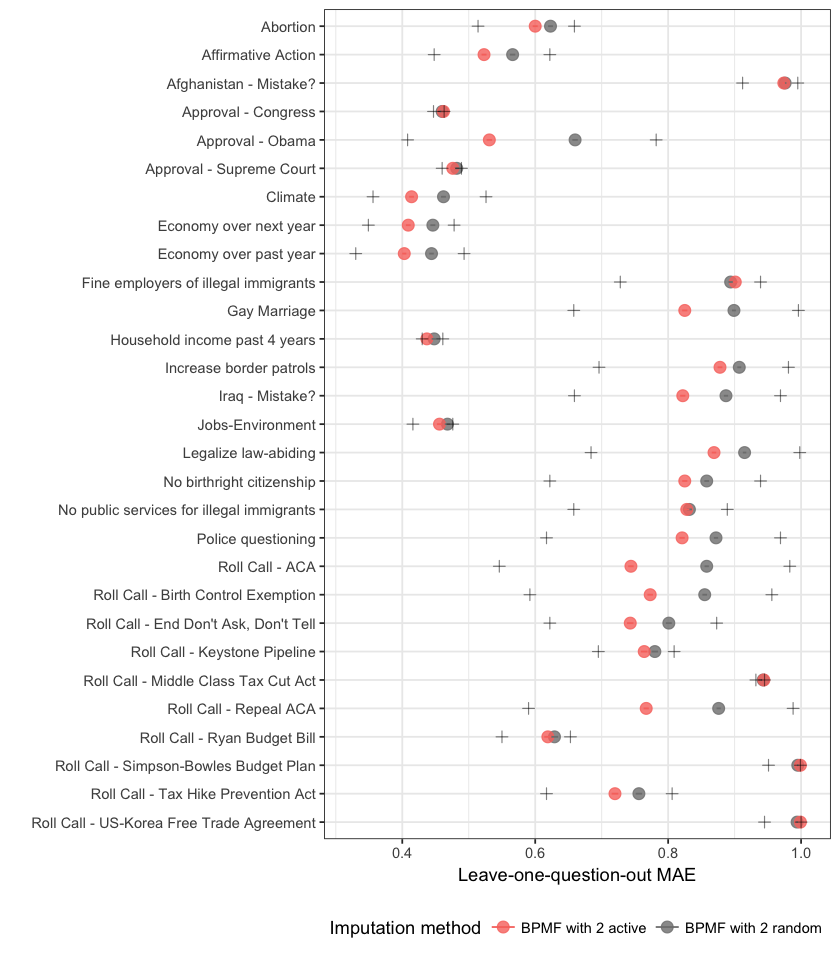

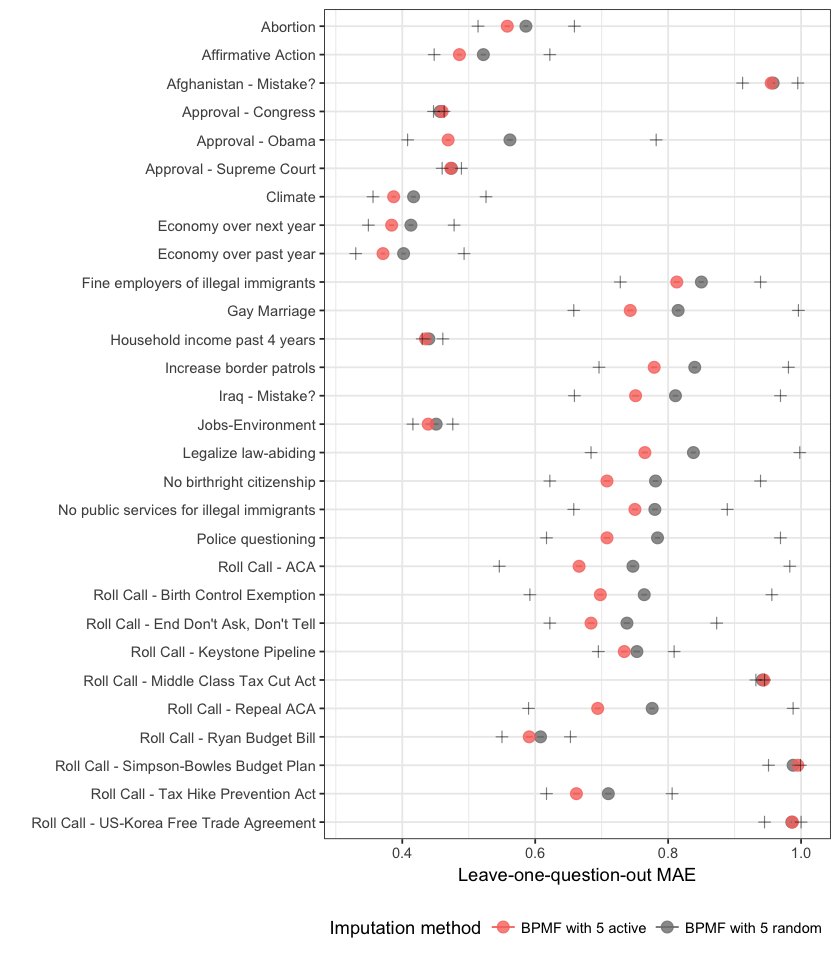

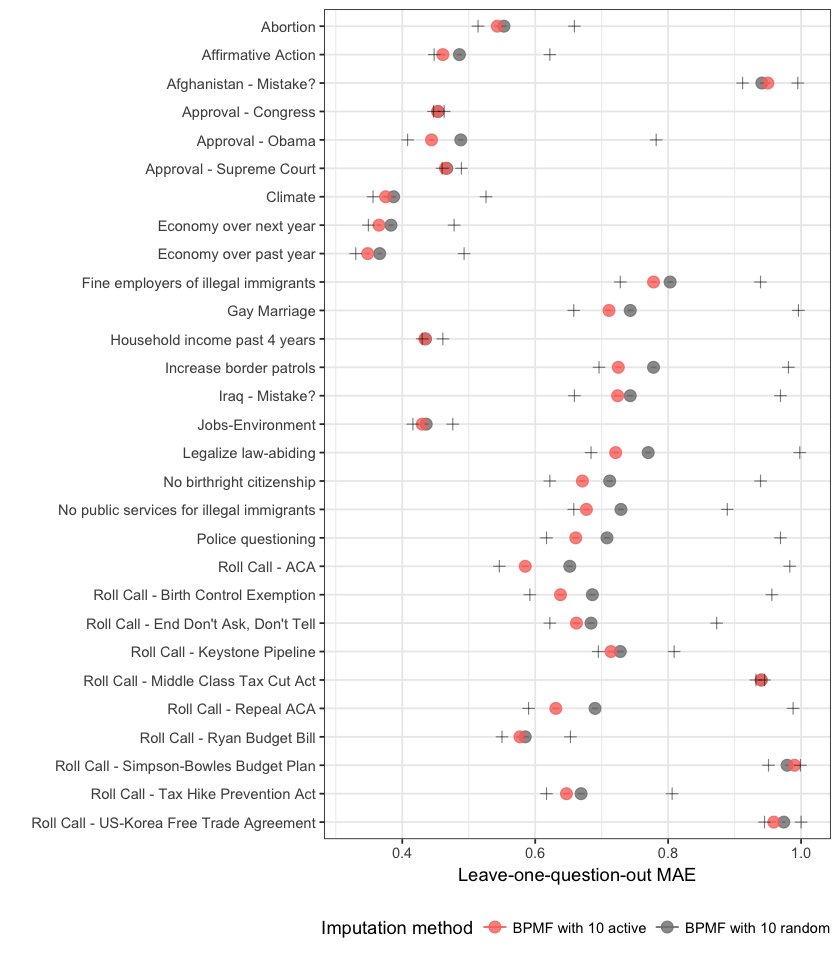

Warning message:
“Column `columns`/`question` joining factors with different levels, coercing to character vector”

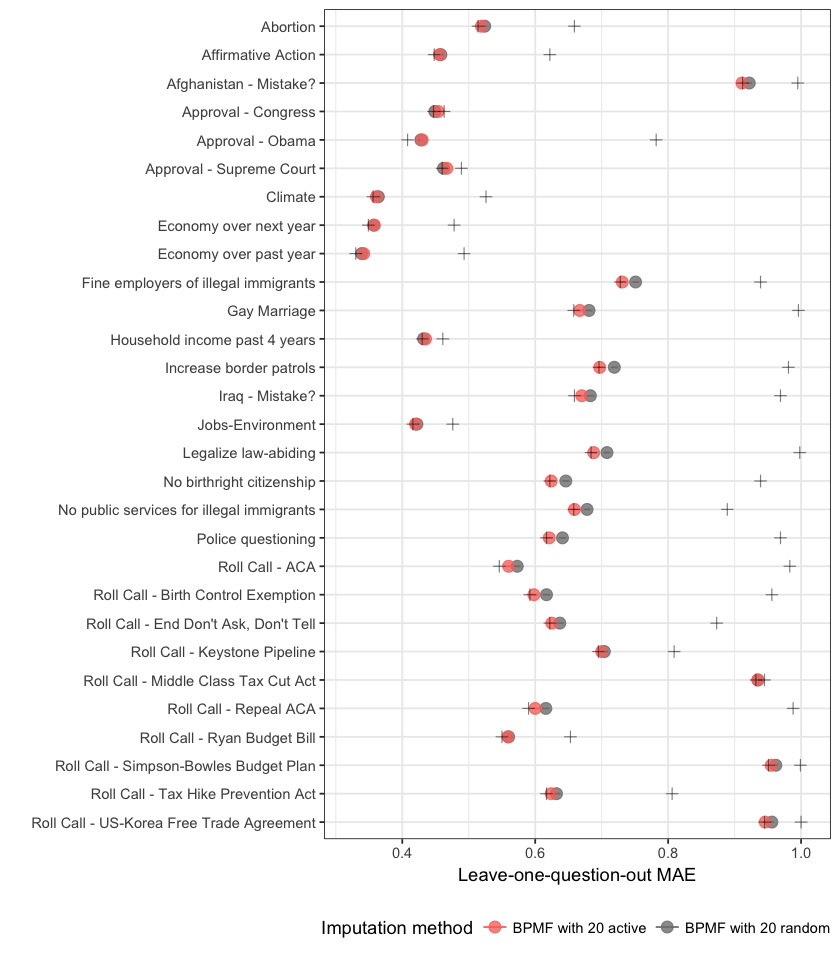

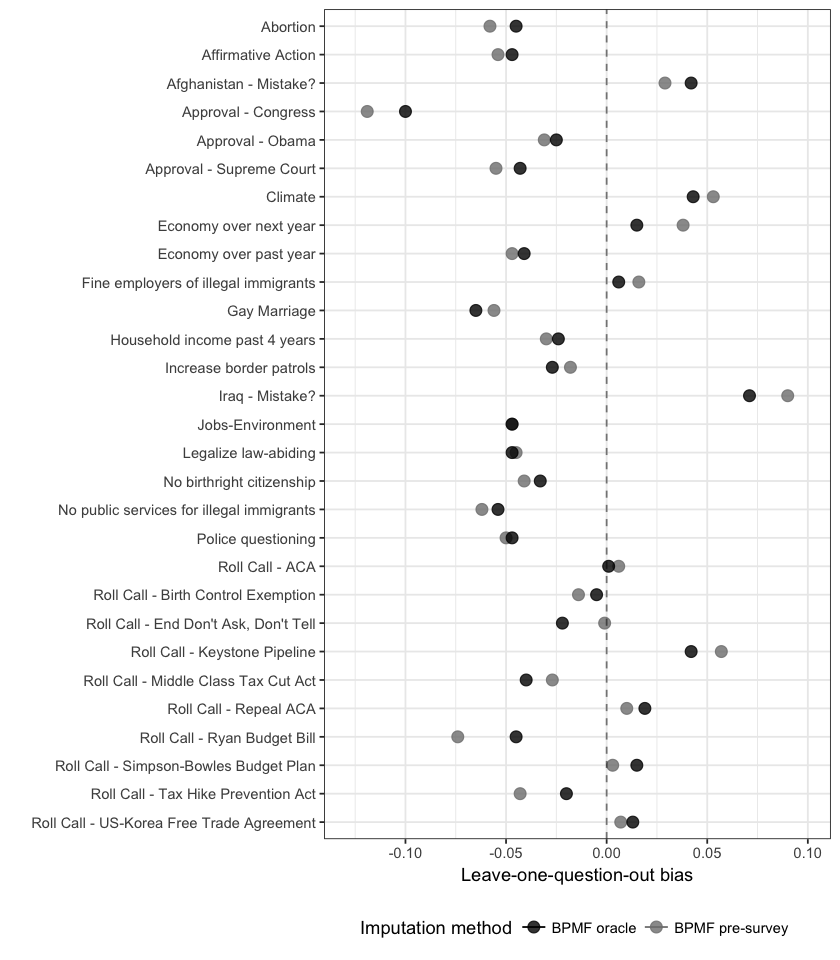

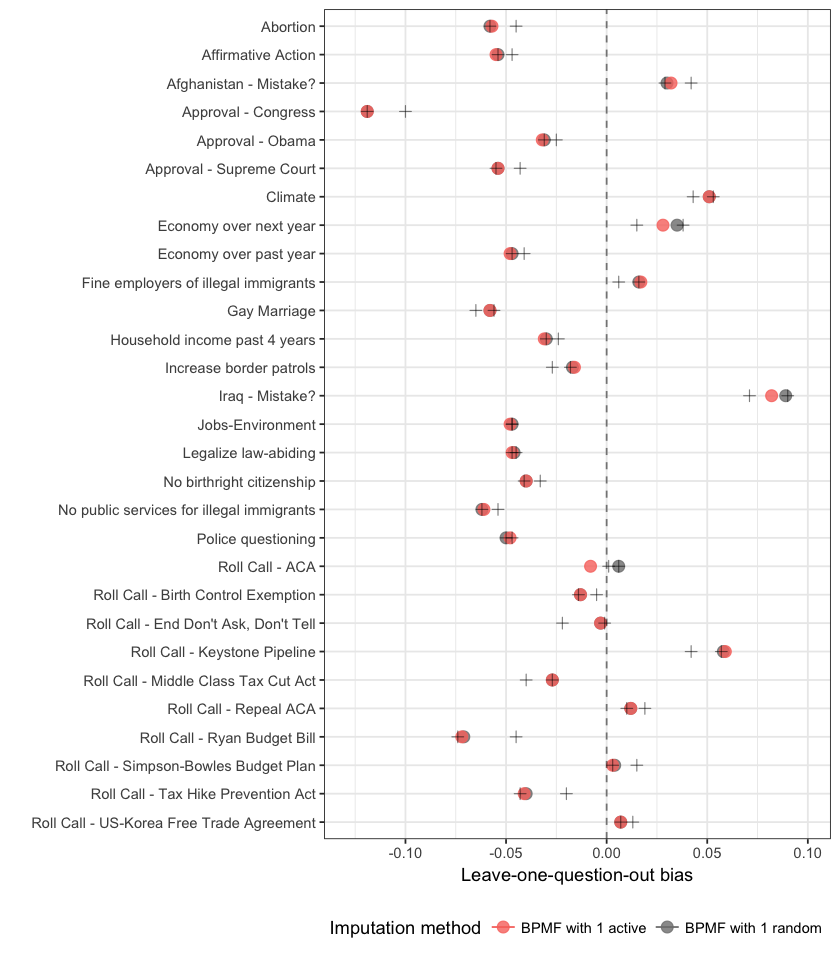

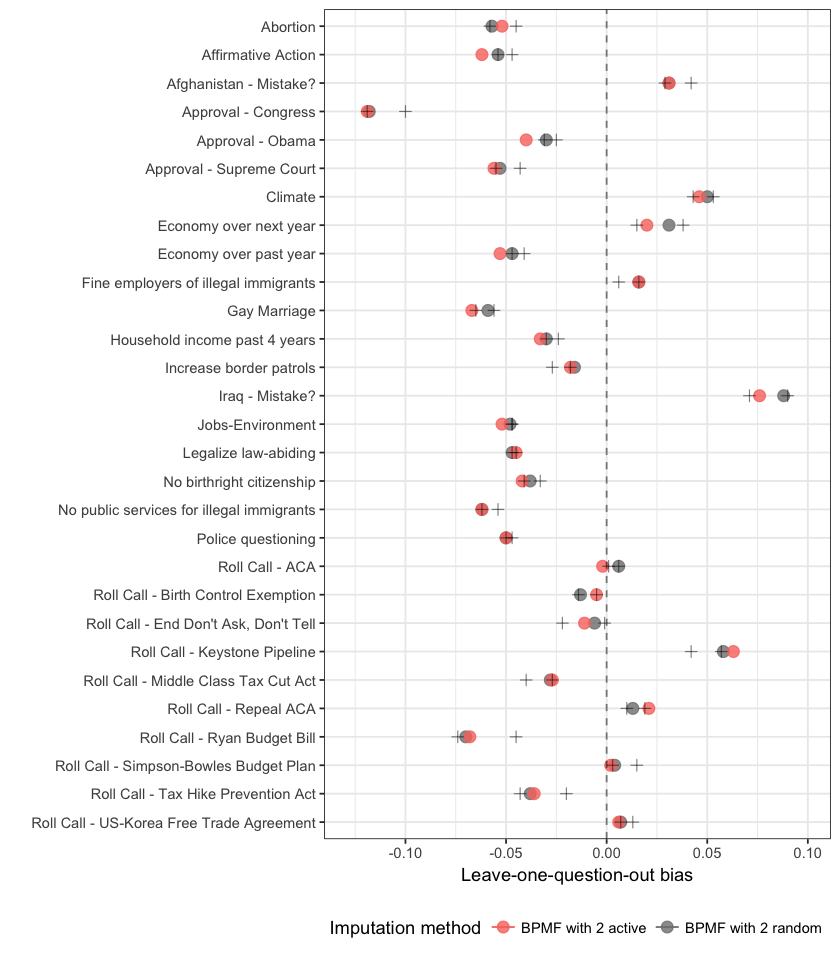

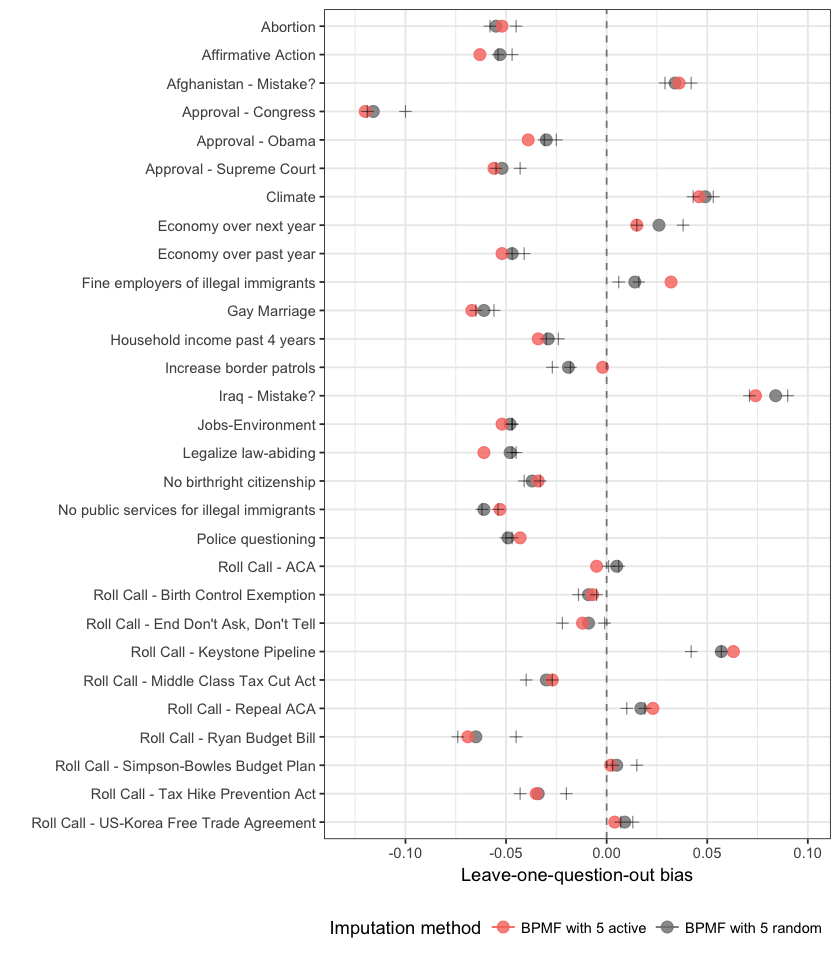

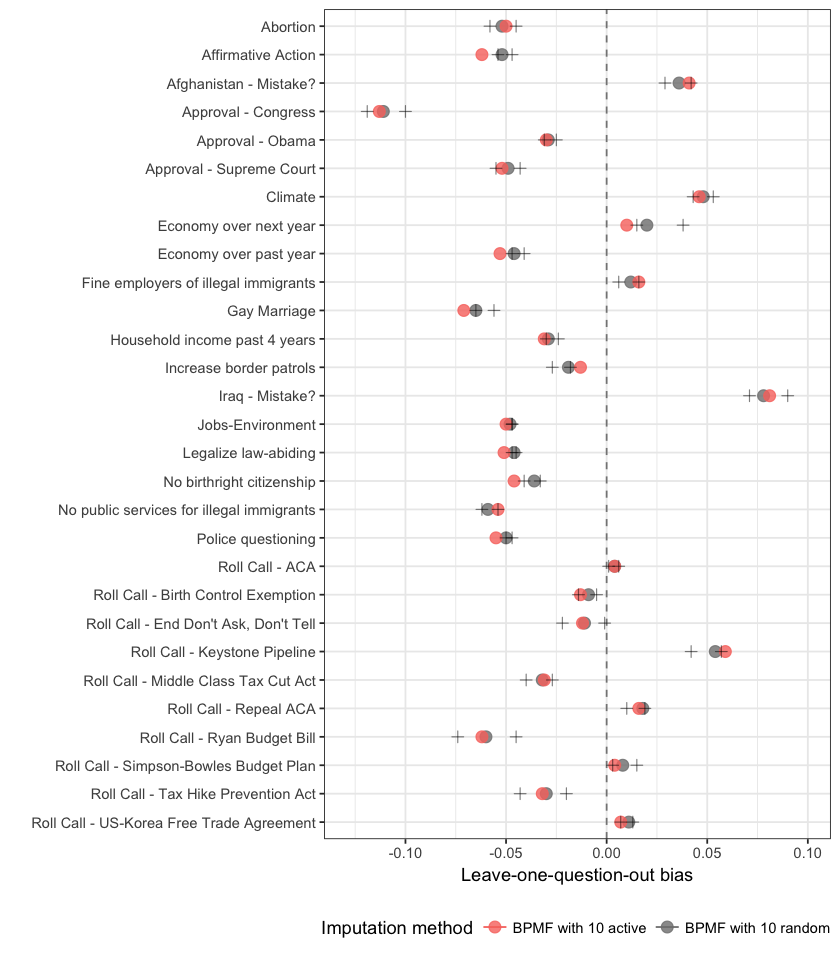

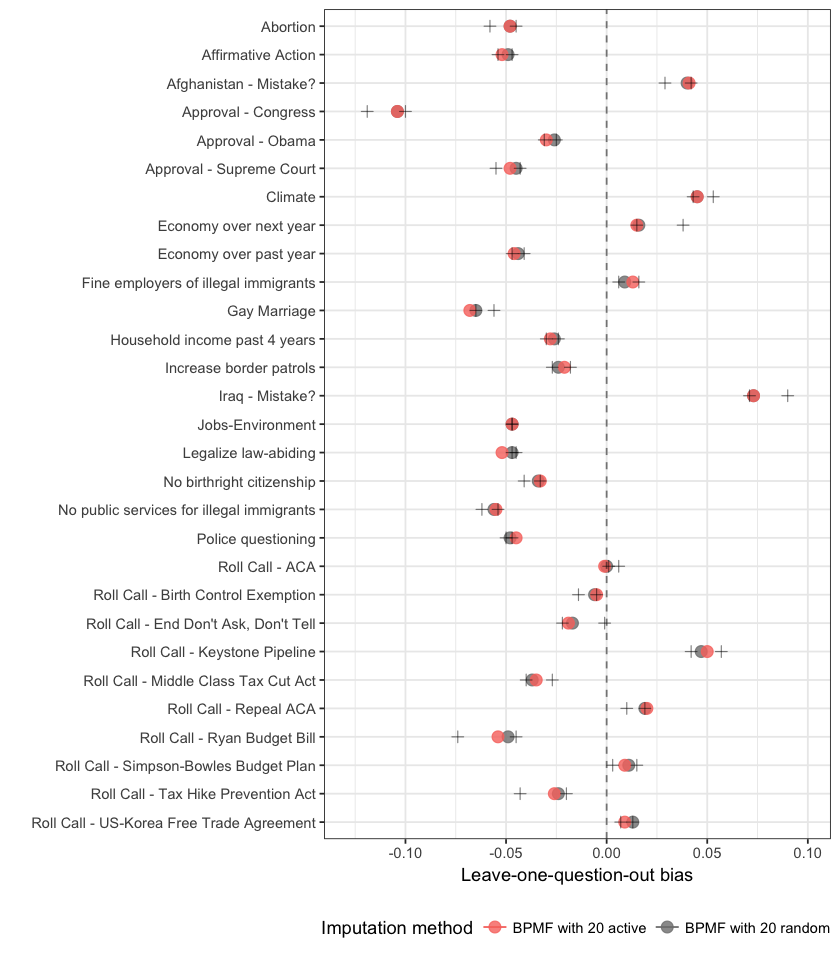

In [11]:
question_df <- read.csv(paste0(filepath, 'data/cces/cces12_questions_short.csv'), stringsAsFactors = T)
plot_per_question_comparison(y_var='mae', sd_var='sdae', y_var_readable='MAE', question_df=question_df)
plot_per_question_comparison(y_var='bias', y_var_readable='bias', question_df=question_df)

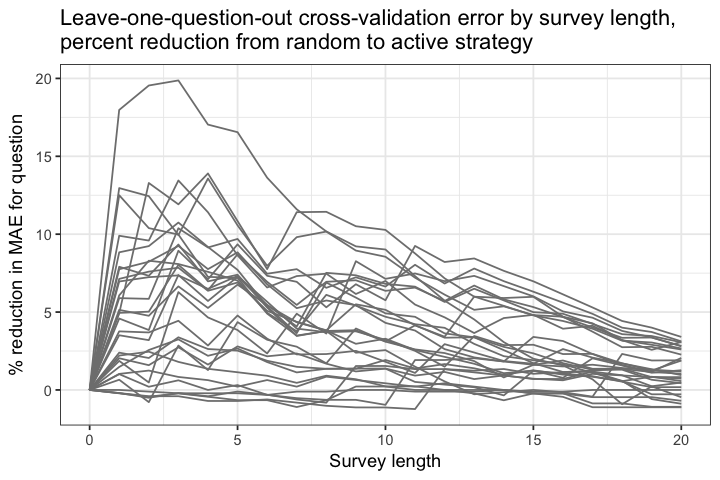

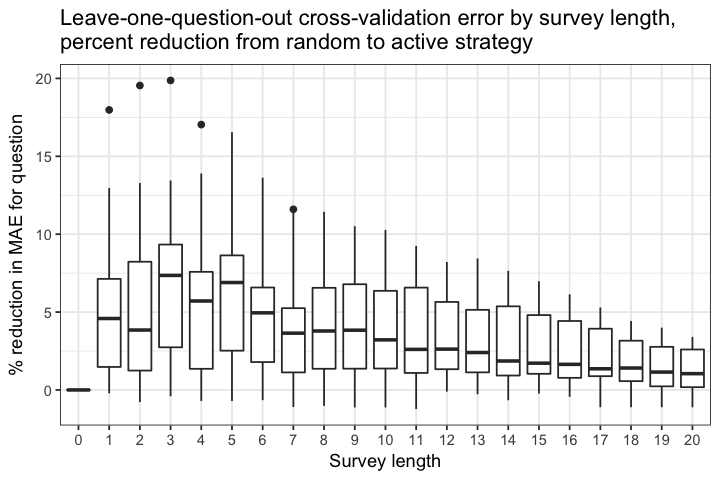

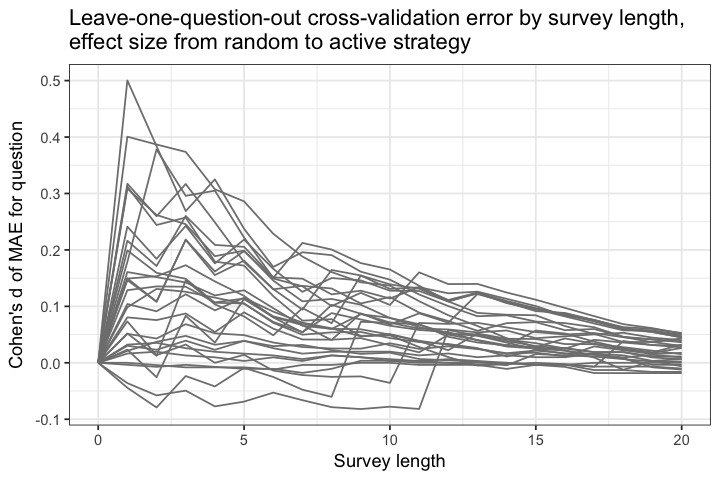

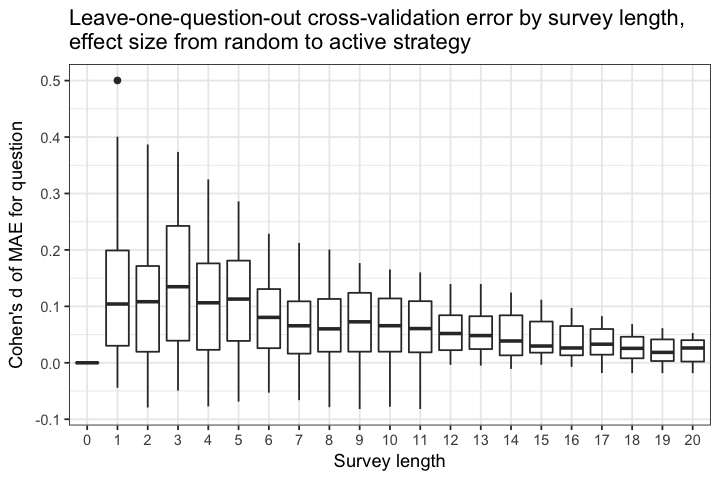

In [12]:
base_method = 'random'
compare_method = 'active'
plot_error_diff(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', show_max_qnum=20)
plot_error_diff(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', show_max_qnum=20, plot_error_diff_fn=plot_error_diff_box)
plot_effect_size(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', sd_var='sdae', show_max_qnum=20)
plot_effect_size(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', sd_var='sdae', show_max_qnum=20, plot_error_diff_fn=plot_error_diff_box)


Warning message in dir.create(paste0(filepath, "figs/", dataset)):
“'/Users/cyz/survey/active_survey/figs/cces12' already exists”

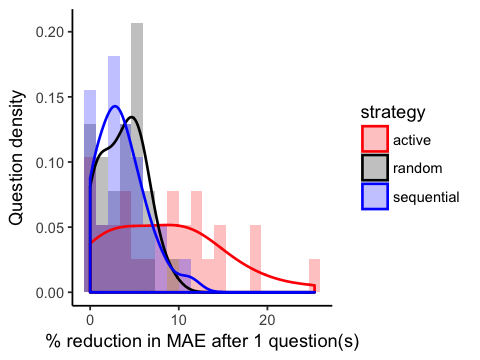

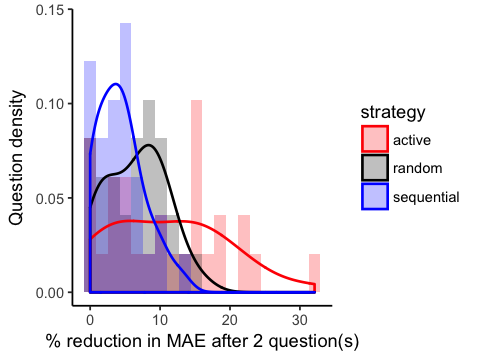

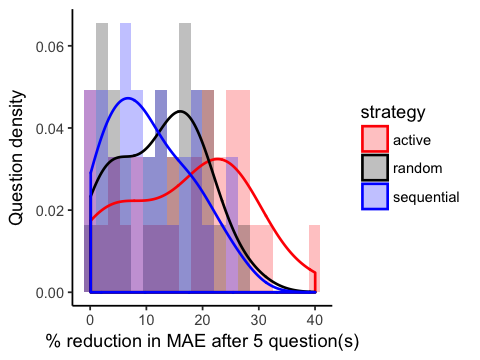

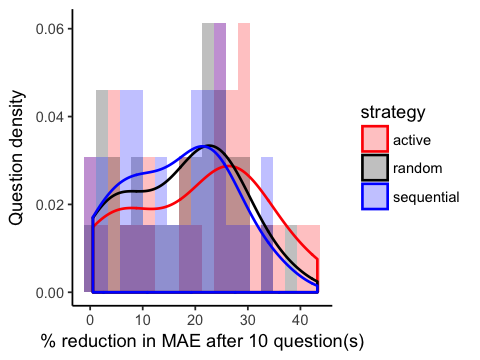

In [14]:
error_reduction_results <- plot_error_reduction_all(y_var='mae')